#Movie Recommendation System

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [67]:
import warnings
warnings.filterwarnings("ignore")

Get the data into a Pandas DataFrame object

In [68]:
col = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('dataset.csv', sep='\t', names=col, header=None)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Get the Movie Titles

In [69]:
titles = pd.read_csv('titles.csv')
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merge the dataset with movie titles

In [70]:
df = pd.merge(df, titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


Calculate the average rating and count of ratings for each movie

In [71]:
ratings = df.groupby('title')['rating'].agg(['mean', 'count'])
ratings.columns = ['rating', 'numOfRatings']
ratings = ratings.sort_values(by='numOfRatings', ascending=False)

Plot histograms for number of ratings and average ratings

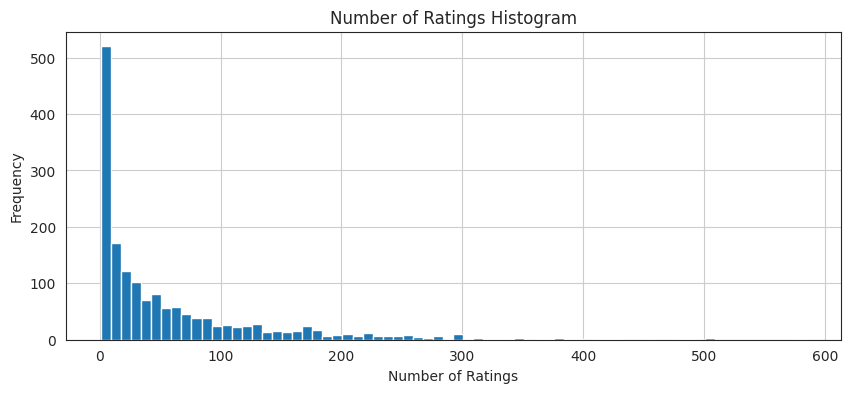

In [72]:
plt.figure(figsize=(10, 4))
ratings['numOfRatings'].hist(bins=70)
plt.title('Number of Ratings Histogram')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

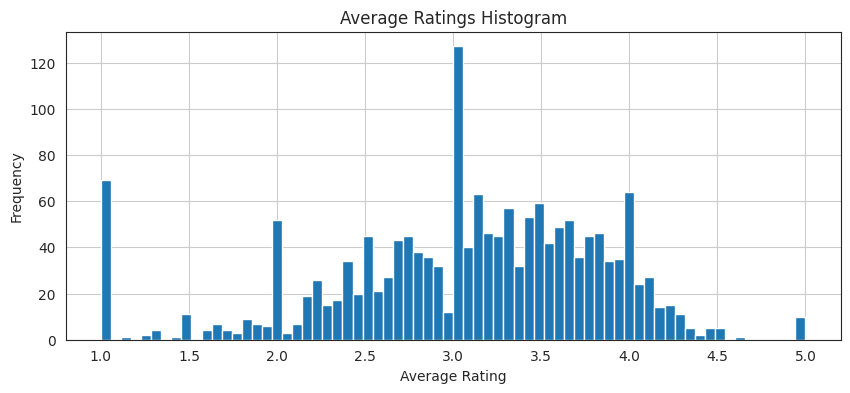

In [73]:
plt.figure(figsize=(10, 4))
ratings['rating'].hist(bins=70)
plt.title('Average Ratings Histogram')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

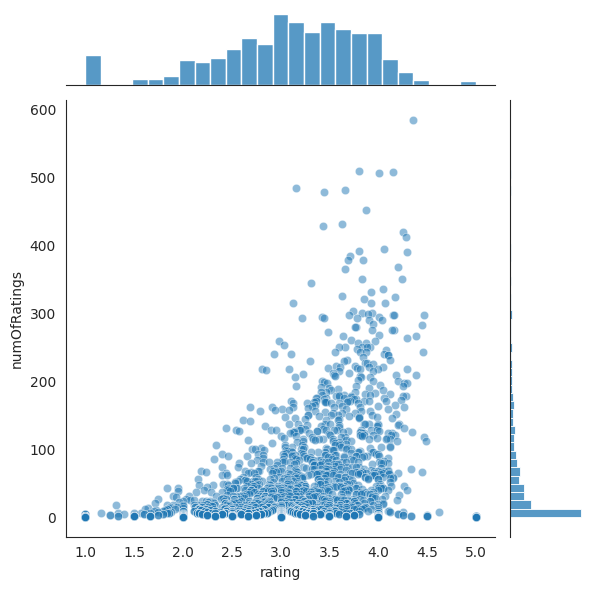

In [74]:
sns.jointplot(x='rating', y='numOfRatings', data=ratings, alpha=0.5)

Create a movie-user matrix

In [75]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most Rated Movies with their Average Ratings

In [76]:
top_rated_movies = ratings.head(10)
print("Top Rated Movies:")
print(top_rated_movies)

Top Rated Movies:
                                 rating  numOfRatings
title                                                
Star Wars (1977)               4.359589           584
Contact (1997)                 3.803536           509
Fargo (1996)                   4.155512           508
Return of the Jedi (1983)      4.007890           507
Liar Liar (1997)               3.156701           485
English Patient, The (1996)    3.656965           481
Scream (1996)                  3.441423           478
Toy Story (1995)               3.878319           452
Air Force One (1997)           3.631090           431
Independence Day (ID4) (1996)  3.438228           429


Function to build movie recommendations

In [77]:
def get_movie_recommendations(movie_title):
    if movie_title not in moviemat.columns:
        return f"Movie '{movie_title}' not found in the dataset."

    movie_user_ratings = moviemat[movie_title]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_to_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_to_movie = corr_to_movie.join(ratings['numOfRatings'])
    result = corr_to_movie[corr_to_movie['numOfRatings'] > 100].sort_values('Correlation', ascending=False).head()

    if result['numOfRatings'].count() >= 5:
        recommendations = result.iloc[1:5].index.tolist()
        return (f"Recommendations for '{movie_title}':\n" +
                "\n".join(f"{idx + 1}: {rec}" for idx, rec in enumerate(recommendations)))
    else:
        return f"Not enough data to provide recommendations for '{movie_title}'."

Save ratings data for later use

In [78]:
ratings = ratings.fillna('-')
ratings.to_csv('recommendations.csv', encoding='utf-8')

Load the dataset saved for reusability from this code block onwards

In [79]:
df_result = pd.read_csv('recommendations.csv')
df_result.head()

,title,rating,numOfRatings
0,Star Wars (1977),4.359589,584
1,Contact (1997),3.803536,509
2,Fargo (1996),4.155512,508
3,Return of the Jedi (1983),4.007890,507
4,Liar Liar (1997),3.156701,485


Load all the movie names

In [80]:
names = df_result['title'].tolist()
print("Available movies:")
for name in names:
    print(name)

Available movies:
Star Wars (1977)
Contact (1997)
Fargo (1996)
Return of the Jedi (1983)
Liar Liar (1997)
English Patient, The (1996)
Scream (1996)
Toy Story (1995)
Air Force One (1997)
Independence Day (ID4) (1996)
Raiders of the Lost Ark (1981)
Godfather, The (1972)
Pulp Fiction (1994)
Twelve Monkeys (1995)
Silence of the Lambs, The (1991)
Jerry Maguire (1996)
Chasing Amy (1997)
Rock, The (1996)
Empire Strikes Back, The (1980)
Star Trek: First Contact (1996)
Titanic (1997)
Back to the Future (1985)
Mission: Impossible (1996)
Fugitive, The (1993)
Indiana Jones and the Last Crusade (1989)
Willy Wonka and the Chocolate Factory (1971)
Princess Bride, The (1987)
Forrest Gump (1994)
Saint, The (1997)
Monty Python and the Holy Grail (1974)
Full Monty, The (1997)
Men in Black (1997)
Terminator, The (1984)
E.T. the Extra-Terrestrial (1982)
Dead Man Walking (1995)
Leaving Las Vegas (1995)
Schindler's List (1993)
Braveheart (1995)
L.A. Confidential (1997)
Conspiracy Theory (1997)
Terminator 2: 

Function to get user input and print recommendations

In [81]:
def main():
    search = input("Enter a movie name: ")
    if search in names:
        result = get_movie_recommendations(search)
        print(result)
    else:
        print(f"Movie '{search}' not found in the dataset.")

Run the interaction function

In [82]:
main()

Enter a movie name: Tokyo Fist (1995)
Recommendations for 'Tokyo Fist (1995)':
1: 12 Angry Men (1957)
2: 2001: A Space Odyssey (1968)
3: Absolute Power (1997)
4: Abyss, The (1989)
